## "Оценка точности модели, переобучение, регуляризация"

Получите значения AUC для различных моделей и их параметров.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,roc_curve, classification_report, accuracy_score, roc_auc_score

%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv( 'adult.csv' )
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

Мы видим знаки вопроса в нескольких столбцах. Надо их заменить на null.

In [4]:
df.replace(['?'], [None], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.reset_index(inplace =True)

In [9]:
df.isnull().sum()

index              0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Замены и удаление прошли успешно, можно приступать к целевому атрибуту и моделям

In [10]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

Заменим в целевом атрибуте '>50K' на 1 и '<=50K' на 0

In [11]:
df['income'].replace('>50K', 1, inplace=True)
df['income'].replace('<=50K', 0, inplace=True)

In [12]:
df['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [13]:
y=df['income']


In [ ]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [ ]:
num = df[['age','capital-gain','education','occupation','capital-loss','educational-num','hours-per-week']]
X = pd.get_dummies(num, columns=['education','occupation'])
X.head()

,age,capital-gain,capital-loss,educational-num,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,0,0,7,40,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38,0,0,9,50,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,0,0,12,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,7688,0,10,40,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,34,0,0,6,30,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


 Разделяем выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)


 возьмем логистическую регрессию и посмотрим качество напрямую

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test) )
print(model.score(X_train, y_train))    


0.8200044224957618
0.813141683778234


In [ ]:
roc_auc_score(model.predict(X_test), y_test)

0.7774879431730537

In [ ]:
predict = model.predict_proba(X_test)

In [ ]:
fpr, tpr, thres = roc_curve( y_test, predict[:, 1] )

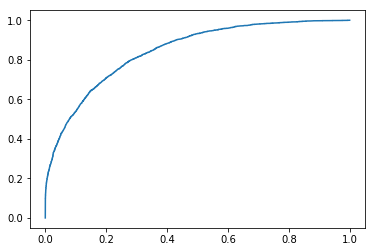

In [ ]:
plt.plot(fpr, tpr)

Качество модели получилось довольно низким. Попробую применить другие модели и посмотрю на их качество.

In [ ]:
#Возьмем DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:

dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, y_train)
proba = dtc.predict_proba(X_test)
preds = dtc.predict(X_test)
fpr_dt, tpr_dt, thres = roc_curve( y_test, proba[:, 1] )
print(dtc.score(X_test, y_test))
print(auc( fpr_dt, tpr_dt))

0.8354094493992776
0.8503898146791355


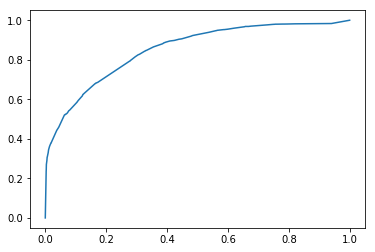

In [ ]:
plt.plot(fpr_dt, tpr_dt)

In [ ]:
#теперь посмотрим какое качество покажет RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:

rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rfc.fit(X_train, y_train)
proba_rfc = rfc.predict_proba(X_test)
preds_rfc = rfc.predict(X_test)
fpr_rfc, tpr_rfc, thres = roc_curve( y_test, proba_rfc[:, 1] )

print( rfc.score(X_test, y_test))
print( auc(fpr_rfc,tpr_rfc))

0.7706198864892755
0.8197135356438563


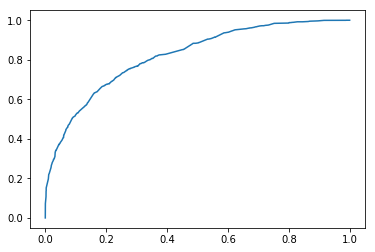

In [ ]:
plt.plot(fpr_rfc,tpr_rfc)

In [ ]:
#посмотрим на качество KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
kn = KNeighborsClassifier(3)
kn.fit(X_train, y_train)
proba_kn = kn.predict_proba(X_test)
preds_kn = kn.predict(X_test)
fpr_kn, tpr_kn, thres_kn = roc_curve( y_test, proba_kn[:, 1] )
print(kn.score(X_test, y_test))
print(auc(fpr_kn,tpr_kn))

In [ ]:
plt.plot(fpr_kn,tpr_kn)

Большой разницы в качеств моделей мы не получили. Посмотрим на сборный график всех моделей

In [ ]:
plt.plot( fpr, tpr, label="LogisticRegression" )
plt.plot( fpr_dt, tpr_dt,label="DecisionTreeClassifier" )
plt.plot( fpr_rfc, tpr_rfc,label="RandomForestClassifier" )
plt.plot( fpr_kn, tpr_kn,label="KNeighborsClassifier" )
plt.legend( loc = 0 )
plt.show()